<a href="https://colab.research.google.com/github/IoannisDem/SimpleDL_models/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#import mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#training dataset dimension
print(x_train.shape)

(60000, 28, 28)


255


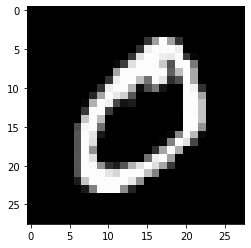

In [ ]:
#plot an image
plt.imshow(x_train[1],cmap='gray')
print(np.amax(x_train[1]))

In [ ]:
#normalise data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

0.48350000784115293


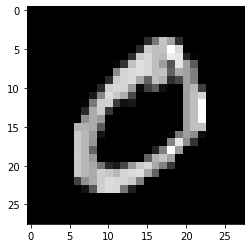

In [ ]:
plt.imshow(x_train[1],cmap='gray')
print(np.amax(x_train[1]))

In [ ]:
#initialising the model
model = tf.keras.models.Sequential()

In [ ]:
#designing the Architecture
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
#compile
#set optimiser, loss and metrics
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size = 50, epochs = 10, verbose = 2, shuffle = True, steps_per_epoch = None)

Epoch 1/10
1200/1200 - 3s - loss: 0.2896 - accuracy: 0.9150 - 3s/epoch - 3ms/step
Epoch 2/10
1200/1200 - 3s - loss: 0.1136 - accuracy: 0.9649 - 3s/epoch - 2ms/step
Epoch 3/10
1200/1200 - 2s - loss: 0.0786 - accuracy: 0.9747 - 2s/epoch - 2ms/step
Epoch 4/10
1200/1200 - 2s - loss: 0.0578 - accuracy: 0.9819 - 2s/epoch - 2ms/step
Epoch 5/10
1200/1200 - 2s - loss: 0.0443 - accuracy: 0.9861 - 2s/epoch - 2ms/step
Epoch 6/10
1200/1200 - 2s - loss: 0.0345 - accuracy: 0.9882 - 2s/epoch - 2ms/step
Epoch 7/10
1200/1200 - 2s - loss: 0.0271 - accuracy: 0.9911 - 2s/epoch - 2ms/step
Epoch 8/10
1200/1200 - 3s - loss: 0.0219 - accuracy: 0.9927 - 3s/epoch - 2ms/step
Epoch 9/10
1200/1200 - 3s - loss: 0.0198 - accuracy: 0.9932 - 3s/epoch - 2ms/step
Epoch 10/10
1200/1200 - 2s - loss: 0.0157 - accuracy: 0.9948 - 2s/epoch - 2ms/step


In [ ]:
#evaluate model
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.9732


In [ ]:
model_save_name = 'epic_num_reader.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/models/epic_num_reader"

In [ ]:
model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/models/epic_num_reader/assets


In [ ]:
#load the model from google drive
model_save_name = 'epic_num_reader.pt'
#path in my google drive, otherwise use path = F"/content/gdrive/My Drive/{file_name}"
path = F"/content/gdrive/My Drive/Colab Notebooks/models/epic_num_reader"
new_model = tf.keras.models.load_model(path)

In [ ]:
#make predictions
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))

7


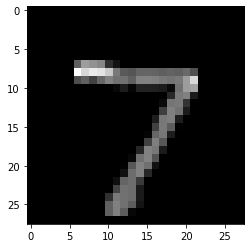

In [ ]:
plt.imshow(x_test[0],cmap='gray')